# Sentiment Analysis of a Netflix Film
# Movie Name : All The Bright Places
All the Bright Places is a 2020 American romantic drama film, directed by Brett Haley, from a screenplay by Jennifer Niven and Liz Hannah, based upon the novel of the same name by Niven. It stars Elle Fanning, Justice Smith, Alexandra Shipp, Kelli O'Hara, Lamar Johnson, Virginia Gardner, Felix Mallard, Sofia Hasmik, Keegan-Michael Key and Luke Wilson.

It was released on February 28, 2020, by Netflix.

In this project I have scraped tweets with hashtag #AlltheBrightPlaces and processed the text using Natural Language Toolkit after which the tweets were catogarized into positive reviews and negative reviews using TestBlob sentiment analyser. Finally using some visualizations I have calculated and visualized the Audience Score for the movie. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from twitterscraper import query_tweets 
import datetime as dt

INFO: {'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; rv:2.2) Gecko/20110201'}


In [3]:
begin_date = dt.date(2020,2,27)
end_date = dt.date(2020,3,1)
lang = 'english'
limit = 10000

In [4]:
tweets_1 = query_tweets("#AlltheBrightPlaces", begindate = begin_date, enddate=end_date, limit=limit, lang=lang)

INFO: queries: ['#AlltheBrightPlaces since:2020-02-27 until:2020-02-28', '#AlltheBrightPlaces since:2020-02-28 until:2020-02-29', '#AlltheBrightPlaces since:2020-02-29 until:2020-03-01']
INFO: Got 57 tweets (57 new).
INFO: Got 939 tweets (882 new).
INFO: Got 2068 tweets (1129 new).


In [6]:
df = pd.DataFrame(i.__dict__ for i in tweets_1)

In [7]:
df.head()

,screen_name,username,user_id,tweet_id,tweet_url,timestamp,timestamp_epochs,text,text_html,links,...,has_media,img_urls,video_url,likes,retweets,replies,is_replied,is_reply_to,parent_tweet_id,reply_to_users
0,PindolDBorbolet,𝐋 𝐮 𝐜 𝐚 𝐒 𝐈 𝐥 𝐯 𝐚 🦋,2682972105,1233178448094547968,/PindolDBorbolet/status/1233178448094547968,2020-02-27 23:53:48,1582847628,Eu amanhã ocupadíssimo o dia todo. \n\n@Netfli...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,True,[https://pbs.twimg.com/media/ER0hQU-UcAEEYSg.jpg],,1,2,0,False,False,,[]
1,bcuzisaidso49,Lauren,66003728,1233176734503186440,/bcuzisaidso49/status/1233176734503186440,2020-02-27 23:46:59,1582847219,These last 2 weeks @netflix has been pretty sp...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,0,0,0,False,False,,[]
2,alxsdzn,≡ Alexis,725647838743425024,1233174281325969408,/alxsdzn/status/1233174281325969408,2020-02-27 23:37:14,1582846634,Napakatagal naman ng All The Bright Places!!!!...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,0,0,0,False,False,,[]
3,BeashelWrites,Amy Beashel,153788367,1233173994112798720,/BeashelWrites/status/1233173994112798720,2020-02-27 23:36:06,1582846566,Waaaaaaaaaaaaaahhhhhhhhhh!\n\n#allthebrightpla...,"<p class=""TweetTextSize js-tweet-text tweet-te...",[https://twitter.com/jenniferniven/status/1233...,...,False,[],,0,0,0,False,False,,[]
4,hiyaitselia,E L I A,3424833328,1233173469799604224,/hiyaitselia/status/1233173469799604224,2020-02-27 23:34:01,1582846441,"So live update rn, I finished reading #AlltheB...","<p class=""TweetTextSize js-tweet-text tweet-te...",[],...,False,[],,1,0,0,False,False,,[]


In [8]:
df.shape

(2068, 21)

In [9]:
tweets_2 = query_tweets("#AllTheBrightPlacesMovie", begindate = begin_date, enddate=end_date, limit=limit, lang=lang)

INFO: queries: ['#AllTheBrightPlacesMovie since:2020-02-27 until:2020-02-28', '#AllTheBrightPlacesMovie since:2020-02-28 until:2020-02-29', '#AllTheBrightPlacesMovie since:2020-02-29 until:2020-03-01']
INFO: Got 64 tweets (64 new).
INFO: Got 575 tweets (511 new).
INFO: Got 2080 tweets (1505 new).


In [10]:
df2 = pd.DataFrame(i.__dict__ for i in tweets_2)

In [11]:
df2.shape

(2080, 21)

In [13]:
final_tweets = pd.concat([df, df2], ignore_index=True, sort =False)

In [15]:
final_tweets.shape

(4148, 21)

In [16]:
tweets = final_tweets.text.drop_duplicates()

In [24]:
tweets.shape

(3906,)

In [25]:
df.to_csv('tweets.csv')

In [26]:
user_tweets = pd.read_csv('tweets.csv')
user_tweets = user_tweets.filter(['text'], axis=1)

In [27]:
df = user_tweets

In [29]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud

In [30]:
#Remove Punchuations!!
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
df["no_punch"] = df["text"].apply(lambda text: remove_punctuation(text))

In [158]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [159]:
#Removing Stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["no_stopwords"] = df["no_punch"].apply(lambda text: remove_stopwords(text))

In [ ]:
#Removing repeating words
from collections import Counter
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["final"] = df["no_stopwords"].apply(lambda text: remove_freqwords(text))


In [34]:
# tweets = df.filter(['final'],axis=1)
tweets = df.filter(['text'],axis=1)

In [35]:
tweets

,text
0,Eu amanhã ocupadíssimo o dia todo. \n\n@Netfli...
1,These last 2 weeks @netflix has been pretty sp...
2,Napakatagal naman ng All The Bright Places!!!!...
3,Waaaaaaaaaaaaaahhhhhhhhhh!\n\n#allthebrightpla...
4,"So live update rn, I finished reading #AlltheB..."
...,...
2063,«La gran Anna Faris dijo en una ocasión que el...
2064,"Sometimes the person you need,\nNeeds you more..."
2065,PSA #AlltheBrightPlaces pic.twitter.com/4D6Abp...
2066,Watch: #ElleFanning and @standup4justice share...


In [37]:
#Identifying sentiment of the text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

sentiments_using_textblob = tweets.text.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,text
pos,1827
neg,241


In [39]:
tweets['sentiment'] = sentiments_using_textblob

In [40]:
tweets['sentiment'].value_counts()

pos    1827
neg     241
Name: sentiment, dtype: int64

In [42]:
c=0
for i in range(len(tweets['text'])):
    if 'cried' in tweets['text'][i]:
        tweets.loc[i,'sentiment']='pos'
        c=c+1
    if 'sad' in tweets['text'][i]:
        tweets.loc[i,'sentiment']='pos'
        c=c+1
    if 'cry' in tweets['text'][i]:
        tweets.loc[i,'sentiment']='pos'
        c=c+1
    if 'crying' in tweets['text'][i]:
        tweets.loc[i,'sentiment']='pos'
        c=c+1
    if 'love' in tweets['text'][i]:
        tweets.loc[i,'sentiment']='pos'
        c=c+1
    if 'loved' in tweets['text'][i]:
        tweets.loc[i,'sentiment']='pos'
        c=c+1

In [43]:
import dtale
d=dtale.show(tweets)
d

In [44]:
tweets['sentiment'].value_counts()

pos    1892
neg     176
Name: sentiment, dtype: int64

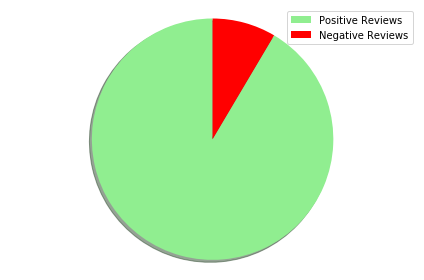

In [45]:
labels = ['Positive Reviews', 'Negative Reviews']
sizes = [1892,176]
colors = ['lightgreen', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

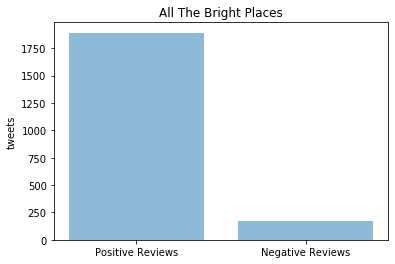

In [46]:
objects = ['Positive Reviews', 'Negative Reviews']
y_pos = np.arange(len(objects))
performance = [1892,176]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('tweets')
plt.title('All The Bright Places')

plt.show()

In [48]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 1892/2068*100 ,
    title = {'text': "Audience Score"},
    gauge = {'axis': {'range': [None, 100]}},
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.show()